# Importing necessary libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import Data

In [3]:
COLUMN_NAMES = [
        'SepalLength', 
        'SepalWidth',
        'PetalLength', 
        'PetalWidth', 
        'Species'
        ]

data = pd.read_csv('iris_data.csv', names=COLUMN_NAMES, header=0)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


# Data Analysis 

## Data Types Analysis

In [4]:
data.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species          int64
dtype: object

## Handle Categorical Variables

In [5]:
data['Species'] = data['Species'].astype("category")
data.dtypes

SepalLength     float64
SepalWidth      float64
PetalLength     float64
PetalWidth      float64
Species        category
dtype: object

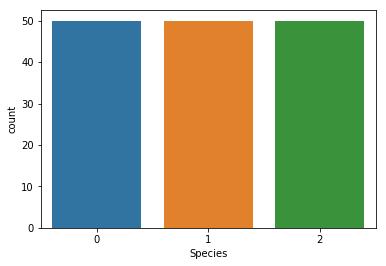

In [15]:
distribution = sn.countplot(x="Species", data=data)
plt.show(distribution)

## Missing Information

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


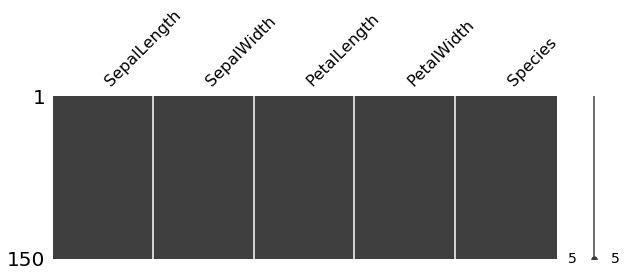

In [6]:
print(data.isnull().sum())

## Correlation Analysis

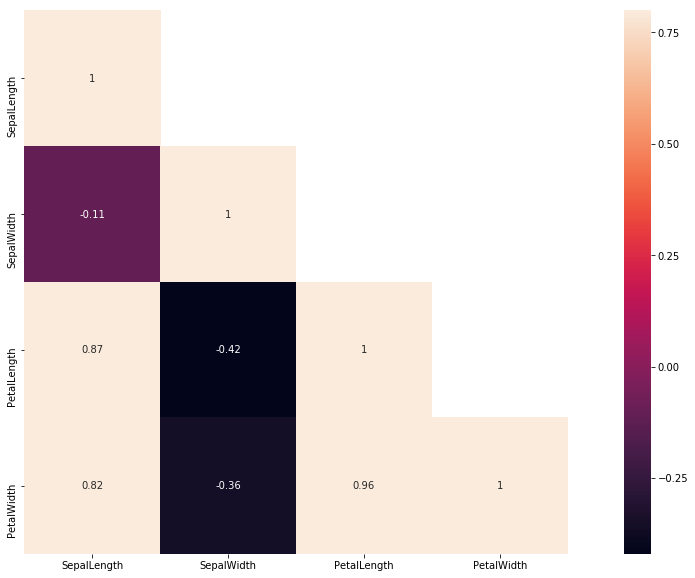

In [7]:
corrMatt = data[["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

# Implementation

## Split Data to Test and Train

In [8]:
output_data = data["Species"]
input_data = data.drop("Species",axis=1)
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

y_train = utils.to_categorical(y_train) 
y_test = utils.to_categorical(y_test)

print("Input training size: ", X_train.shape[0])
print("Output training size: ", y_train.shape[0])
print("Input testing size: ", X_test.shape[0])
print("Output testing size: ", y_test.shape[0])

Input training size:  105
Output training size:  105
Input testing size:  45
Output testing size:  45


In [9]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
81,6.1,2.9,4.7,1.4
133,5.5,2.3,4.0,1.3
137,4.8,3.4,1.9,0.2
75,4.9,3.1,1.5,0.1
109,4.8,3.1,1.6,0.2


## Creating & compiling a model

In [10]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training a model

In [11]:
model.fit(X_train, y_train, epochs=300, batch_size=10)

Epoch 1/300
105/105 [==============================] - 0s 2ms/step - loss: 1.6388 - acc: 0.2476
Epoch 2/300
105/105 [==============================] - 0s 76us/step - loss: 1.3490 - acc: 0.0000e+00
Epoch 3/300
105/105 [==============================] - 0s 95us/step - loss: 1.2546 - acc: 0.1905
Epoch 4/300
105/105 [==============================] - 0s 86us/step - loss: 1.2030 - acc: 0.3333
Epoch 5/300
105/105 [==============================] - 0s 105us/step - loss: 1.1657 - acc: 0.3333
Epoch 6/300
105/105 [==============================] - 0s 95us/step - loss: 1.1281 - acc: 0.3333
Epoch 7/300
105/105 [==============================] - 0s 76us/step - loss: 1.0956 - acc: 0.3333
Epoch 8/300
105/105 [==============================] - 0s 95us/step - loss: 1.0652 - acc: 0.3333
Epoch 9/300
105/105 [==============================] - 0s 76us/step - loss: 1.0336 - acc: 0.3333
Epoch 10/300
105/105 [==============================] - 0s 86us/step - loss: 1.0076 - acc: 0.3333
Epoch 11/300
105/105 [===

Epoch 167/300
105/105 [==============================] - 0s 76us/step - loss: 0.0678 - acc: 0.9810
Epoch 168/300
105/105 [==============================] - 0s 76us/step - loss: 0.0675 - acc: 0.9810
Epoch 169/300
105/105 [==============================] - 0s 95us/step - loss: 0.0671 - acc: 0.9810
Epoch 170/300
105/105 [==============================] - 0s 86us/step - loss: 0.0683 - acc: 0.9810
Epoch 171/300
105/105 [==============================] - 0s 76us/step - loss: 0.0661 - acc: 0.9810
Epoch 172/300
105/105 [==============================] - 0s 95us/step - loss: 0.0675 - acc: 0.9905
Epoch 173/300
105/105 [==============================] - 0s 95us/step - loss: 0.0670 - acc: 0.9810
Epoch 174/300
105/105 [==============================] - 0s 86us/step - loss: 0.0656 - acc: 0.9810
Epoch 175/300
105/105 [==============================] - 0s 95us/step - loss: 0.0696 - acc: 0.9810
Epoch 176/300
105/105 [==============================] - 0s 95us/step - loss: 0.0692 - acc: 0.9810
Epoch 177/

## Evaluate the model

In [12]:
scores = model.evaluate(X_test, y_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

45/45 [==============================] - 0s 756us/step

Accuracy: 95.56%


## Predict

In [13]:
prediction = model.predict(X_test)
prediction1 = pd.DataFrame({'IRIS1':prediction[:,0],'IRIS2':prediction[:,1], 'IRIS3':prediction[:,2]})
prediction1.round(decimals=4).head()

,IRIS1,IRIS2,IRIS3
0,0.0000,0.0023,0.9977
1,0.0000,0.0084,0.9916
2,0.9989,0.0011,0.0000
3,0.0007,0.9558,0.0436
4,0.0017,0.9958,0.0025


In [14]:
real_values = pd.DataFrame(y_test)
real_values.head()

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
